In [6]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances
from net_utils import *

In [10]:
def f(x,y):
    return 4+x+y
def g(x,y):
    return 1+2*y
def h(x,y):
    return 2*x
def i(x,y):
    return 5
def j(x,y):
    return 5+x
def l(x,y):
    return 5+y
def m(x,y):
    return max(f(x,y),g(x,y),h(x,y),i(x,y),j(x,y),l(x,y))

In [11]:
def couple (f):
    return (f(1,0)-f(0,0),f(0,1)-f(0,0))

In [13]:
def diffd (a,mn,b,r,u,X,k,c):
    count = []
    for i in range(0,len(a)):
        if a[i]+mn>=0:
            count.append(i)
        if len(count) == 3:
            X.append([b[i] for i in count])
        if len(count)>= 2:
            r.append(k)
            u.append(c)
    return r,u,X

In [14]:
t=np.linspace(-10,10,2002)
r=[]
u=[]
X=[]
b=[couple(f),couple(g),couple(h),couple(i),couple(j),couple(l)]
for k in t:
    for c in t:
        mm = m(k,c)
        a = [f(k,c)-mm,g(k,c)-mm,h(k,c)-mm,i(k,c)-mm,j(k,c)-mm,l(k,c)-mm]
        r,u,X= diffd(a,0.01,b,r,u,X,k,c)

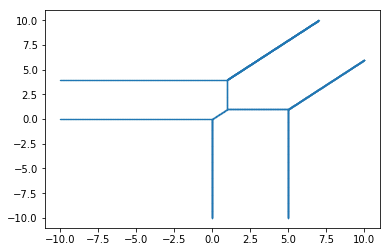

In [15]:
plt.scatter(r,u,0.01)
plt.show()

In [3]:
p = Polynomial_Tropical((1,1,4),(0,2,1),(2,0,0),(0,0,5),(1,0,5),(0,1,5))
x = np.linspace(-7, 7,100, endpoint=True)
X = np.stack(np.meshgrid(x, x))
G = p(X)
A,B = np.meshgrid(x, x)

NameError: name 'Polynomial_Tropical' is not defined

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(A, B, G, 1000)

In [ ]:
k = np.random.rand((200)).reshape(100,-1)
k.shape

In [ ]:
circle = np.array([(x[0],x[1],m(x[0],x[1])) for x in k])
circle.shape

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(circle[:, 0], circle[:, 1],circle[:, 2], marker='o',
            s=25, edgecolor='k')

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [8]:
X, Y = make_blobs(n_samples=200, centers=circle, n_features=3,
                 random_state=0,cluster_std =0.1)

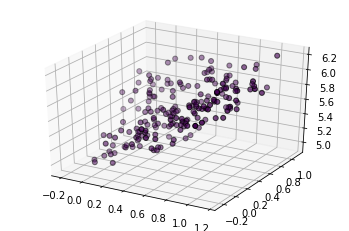

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], marker='o', c=np.ones(200),
            s=25, edgecolor='k')

In [10]:
r = np.random.uniform(0,1,(1000,3))
r[:,2]=3*r[:,2]+4

In [11]:
lr = (np.min(euclidean_distances(circle,r),axis = 0)>0.2)*1.

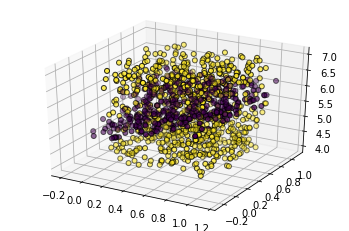

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:, 2], marker='o', c=np.ones(200),
            s=25, edgecolor='k')
ax.scatter(r[:, 0], r[:, 1],r[:, 2], marker='o', c=lr,s=25, edgecolor='k')


In [13]:
Xtrain = np.concatenate((r,X))
Ytrain = np.concatenate((lr,np.zeros(200))).astype(float)
Xtrain.shape,Ytrain.shape
Ytrain = Ytrain.reshape(-1,1)
Ytrain.shape

(1200, 1)

In [30]:
t = np.linspace(0, 4,100, endpoint=False)
T = np.zeros((1010100,3))
a=0
for i in t:
    for j in t:
        for k in t:
            T[a]=np.array([i,j,2*k+4])
            a+=1
        a+=1
    a+=1

In [31]:
model = Simple_Net()
#optimizer = optim.Adam(model.parameters(), weight_decay=0.01)
optimizer = Adam_bis(model.parameters(), prec = 4,weight_decay=0)
criterion = F.binary_cross_entropy_with_logits
file_dataset = csvDataset(Xtrain,Ytrain,transform= ToTensor())
final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=32, shuffle=True)
inference_dataset = csvDataset(T,np.zeros((1010100,3)),transform= ToTensor())
inference_loader = torch.utils.data.DataLoader(inference_dataset,batch_size=1010100, shuffle=False)

In [32]:
model,train_accuracy,eval_n = train_model_cc_fast(model, final_loader,inference_loader, criterion,
    optimizer,Xtrain.shape[0], num_epochs=49)

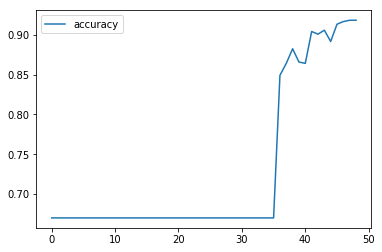

In [33]:
plt.plot(train_accuracy,label='accuracy')
plt.legend()

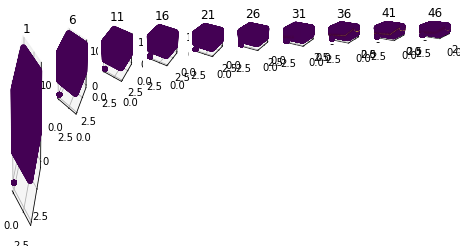

In [43]:
fig = plt.figure(figsize=plt.figaspect(0.5))

for i in range(10):
    ax = fig.add_subplot(i+1,10, i+1, projection='3d')
    rr = eval_n[i*5].reshape(1010100)
    ax.scatter(T[:, 0], T[:, 1],T[:, 2], c =rr)
    ax.set_title(str(1+i*5))